In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

In [30]:

# Load the dataset
df = pd.read_csv('../../data/XAUUSD_2010-2023.csv').head(100_000)
df

,time,open,high,low,close,rsi14,sma14
0,2010-01-03 18:00:00,1098.45,1100.00,1098.05,1099.95,81.98,1096.38
1,2010-01-03 18:05:00,1100.00,1100.30,1099.45,1099.75,79.17,1096.72
2,2010-01-03 18:10:00,1099.70,1100.10,1099.30,1099.45,75.02,1097.03
3,2010-01-03 18:15:00,1099.50,1099.60,1098.50,1099.45,75.02,1097.30
4,2010-01-03 18:20:00,1099.40,1099.60,1098.90,1098.90,67.50,1097.50
...,...,...,...,...,...,...,...
99995,2011-05-23 20:00:00,1514.23,1514.83,1513.88,1514.73,44.35,1514.50
99996,2011-05-23 20:05:00,1514.78,1515.53,1514.58,1515.23,51.24,1514.50
99997,2011-05-23 20:10:00,1515.18,1515.88,1515.13,1515.43,53.71,1514.51
99998,2011-05-23 20:15:00,1515.38,1516.78,1515.38,1516.63,65.12,1514.62


In [31]:
df = df.drop(['rsi14', 'sma14'], axis=1)
df

,time,open,high,low,close
0,2010-01-03 18:00:00,1098.45,1100.00,1098.05,1099.95
1,2010-01-03 18:05:00,1100.00,1100.30,1099.45,1099.75
2,2010-01-03 18:10:00,1099.70,1100.10,1099.30,1099.45
3,2010-01-03 18:15:00,1099.50,1099.60,1098.50,1099.45
4,2010-01-03 18:20:00,1099.40,1099.60,1098.90,1098.90
...,...,...,...,...,...
99995,2011-05-23 20:00:00,1514.23,1514.83,1513.88,1514.73
99996,2011-05-23 20:05:00,1514.78,1515.53,1514.58,1515.23
99997,2011-05-23 20:10:00,1515.18,1515.88,1515.13,1515.43
99998,2011-05-23 20:15:00,1515.38,1516.78,1515.38,1516.63


In [129]:

# Convert the 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

In [130]:

# Create a label variable
df['price_high'] = (df['high'] > df['open']).astype(int)
df['price_low'] = (df['low'] < df['open']).astype(int)
df['price_close'] = (df['close'] > df['open']).astype(int)
# merge df with price_high,price_low, and  price_close, to data set
df

,time,open,high,low,close,price_high,price_low,price_close,status
0,2010-01-03 18:00:00,1098.45,1100.00,1098.05,1099.95,1,1,1,7.0
1,2010-01-03 18:05:00,1100.00,1100.30,1099.45,1099.75,1,1,0,4.0
2,2010-01-03 18:10:00,1099.70,1100.10,1099.30,1099.45,1,1,0,4.0
3,2010-01-03 18:15:00,1099.50,1099.60,1098.50,1099.45,1,1,0,4.0
4,2010-01-03 18:20:00,1099.40,1099.60,1098.90,1098.90,1,1,0,4.0
...,...,...,...,...,...,...,...,...,...
99995,2011-05-23 20:00:00,1514.23,1514.83,1513.88,1514.73,1,1,1,7.0
99996,2011-05-23 20:05:00,1514.78,1515.53,1514.58,1515.23,1,1,1,7.0
99997,2011-05-23 20:10:00,1515.18,1515.88,1515.13,1515.43,1,1,1,7.0
99998,2011-05-23 20:15:00,1515.38,1516.78,1515.38,1516.63,1,0,1,5.0


<Axes: ylabel='Frequency'>

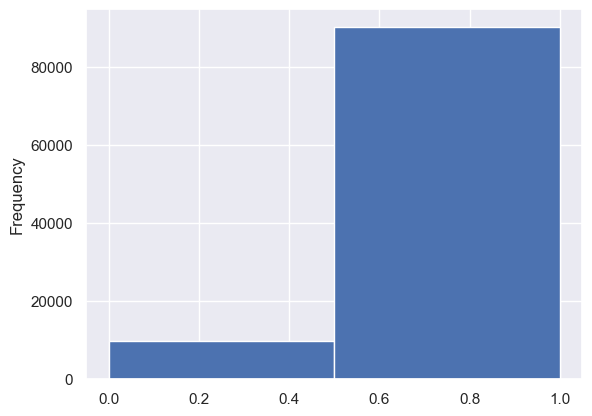

In [143]:
df['price_high'].plot.hist(bins=2)

In [147]:

df['price_high'].describe(include=0) 

count    100000.000000
mean          0.903280
std           0.295578
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: price_high, dtype: float64

In [148]:
df['price_high'].describe(include=1)
 

count    100000.000000
mean          0.903280
std           0.295578
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: price_high, dtype: float64

In [142]:
(df['price_high'] == 0).count()

100000

In [ ]:
df['price_low'].plot.hist(bins=2)

<Axes: ylabel='Frequency'>

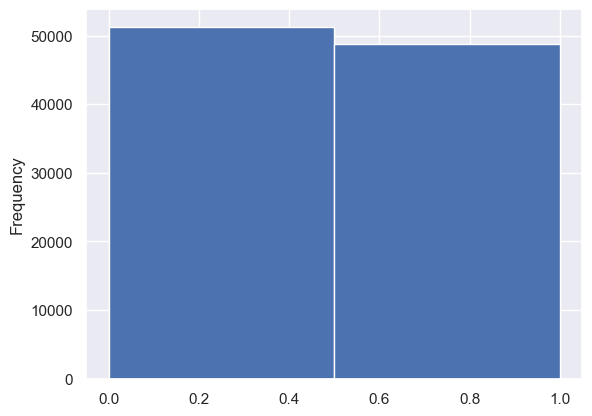

In [52]:
df['price_close'].plot.hist(bins=2)

<Axes: ylabel='Frequency'>

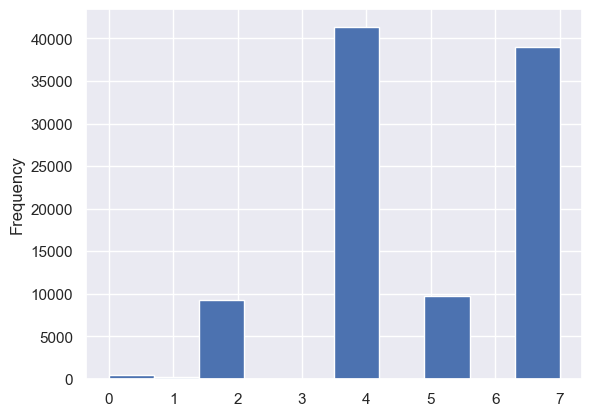

In [60]:
# Define the conditions for each possible combination
conditions = [
    (df['price_high'] == 0) & (df['price_low'] == 0) & (df['price_close'] == 0),
    (df['price_high'] == 1) & (df['price_low'] == 0) & (df['price_close'] == 0),
    (df['price_high'] == 0) & (df['price_low'] == 1) & (df['price_close'] == 0),
    # 
    (df['price_high'] == 0) & (df['price_low'] == 0) & (df['price_close'] == 1),
    (df['price_high'] == 1) & (df['price_low'] == 1) & (df['price_close'] == 0),
    (df['price_high'] == 1) & (df['price_low'] == 0) & (df['price_close'] == 1),
    # 
    (df['price_high'] == 0) & (df['price_low'] == 1) & (df['price_close'] == 1),
    (df['price_high'] == 1) & (df['price_low'] == 1) & (df['price_close'] == 1),
    # add
    # (df['price_high'] == 0) & (df['price_low'] == 0) & (df['price_close'] == 1) & (df['close'] > df['high']),
    # (df['price_high'] == 0) & (df['price_low'] == 1) & (df['price_close'] == 0) & (df['low'] < df['close'])
]

# Define the corresponding choices
choices = [0, 1, 2, 3, 4, 5, 6, 7,
           # add
           # 8, 9
           ]

# Apply the conditions to create the result column
df['status'] = np.select(conditions, choices, default=np.nan)
df['status'].plot.hist(bins=10)

In [73]:

# Drop rows with NaN values in the classification column
df = df.dropna(subset=['status'])

In [95]:
listColumn = list(df.columns)
listColumn.remove('time')
listColumn.remove('price_high')
listColumn.remove('price_low')
listColumn.remove('price_close')
# listColumn.remove('status')
listColumn

['open', 'high', 'low', 'close', 'status']

In [ ]:

# Define features and target

X = df[listColumn]
y = df['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:

# Initialize and train the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [106]:

# Make predictions
y_pred = knn.predict(X_test)

In [107]:

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print("Classification Report:")
print(report)
print(f"confusion : ")
print(confusion)
print(f"Accuracy: {accuracy}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.67      0.78        86
         1.0       0.50      0.20      0.29        35
         2.0       0.98      0.99      0.98      1786
         4.0       1.00      1.00      1.00      8210
         5.0       1.00      0.99      0.99      2007
         7.0       1.00      1.00      1.00      7876

    accuracy                           1.00     20000
   macro avg       0.90      0.81      0.84     20000
weighted avg       0.99      1.00      0.99     20000

confusion : 
[[  58    7   21    0    0    0]
 [   5    7   23    0    0    0]
 [   0    0 1769   17    0    0]
 [   0    0    0 8210    0    0]
 [   0    0    0   13 1984   10]
 [   0    0    0    0    1 7875]]
Accuracy: 0.99515


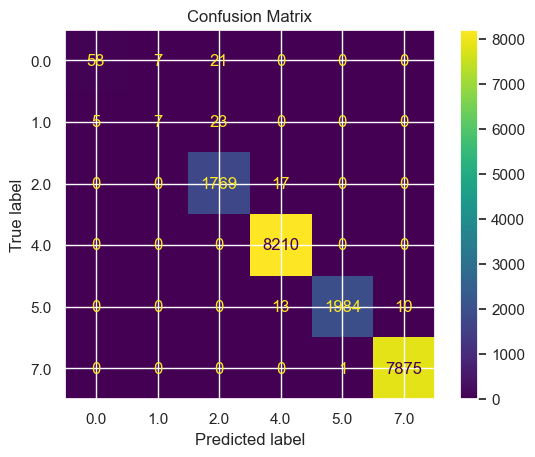

In [108]:

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

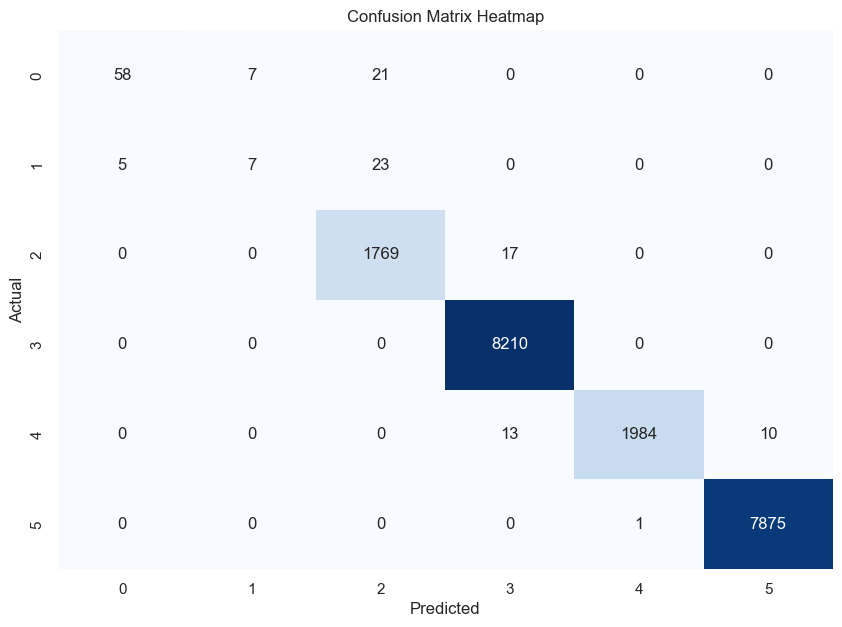

In [109]:
# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


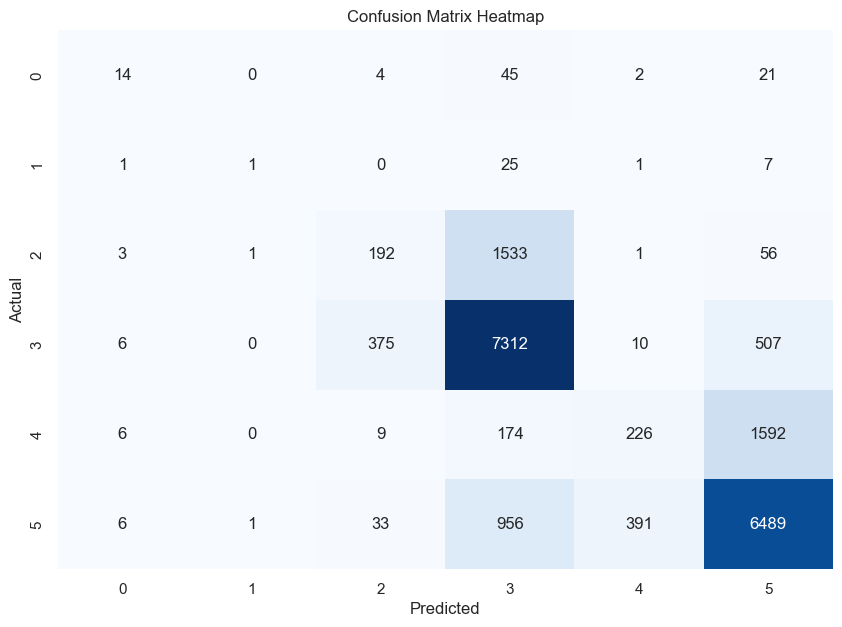

IndexError: index 6 is out of bounds for axis 1 with size 6

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# ROC Curve
y_prob = knn.predict_proba(X_test)[:1, 6]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [16]:

listColumn = list(df.columns)
listColumn.remove('time')
listColumn.remove('price_high')
listColumn.remove('price_low')
listColumn.remove('price_close')
listColumn

['open', 'high', 'low', 'close', 'status', 'Cluster']

In [17]:


# Select relevant features for classification
features = listColumn
X = df[features]
y = df['status']

In [18]:

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:

# Apply K-Means clustering with the optimal number of clusters
optimal_clusters = 4  # Based on the elbow method graph
kmeans = KMeans(
    n_clusters=optimal_clusters,
    random_state=42
)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df['Cluster']

0        2
1        0
2        0
3        0
4        0
        ..
99995    3
99996    3
99997    3
99998    3
99999    3
Name: Cluster, Length: 100000, dtype: int32

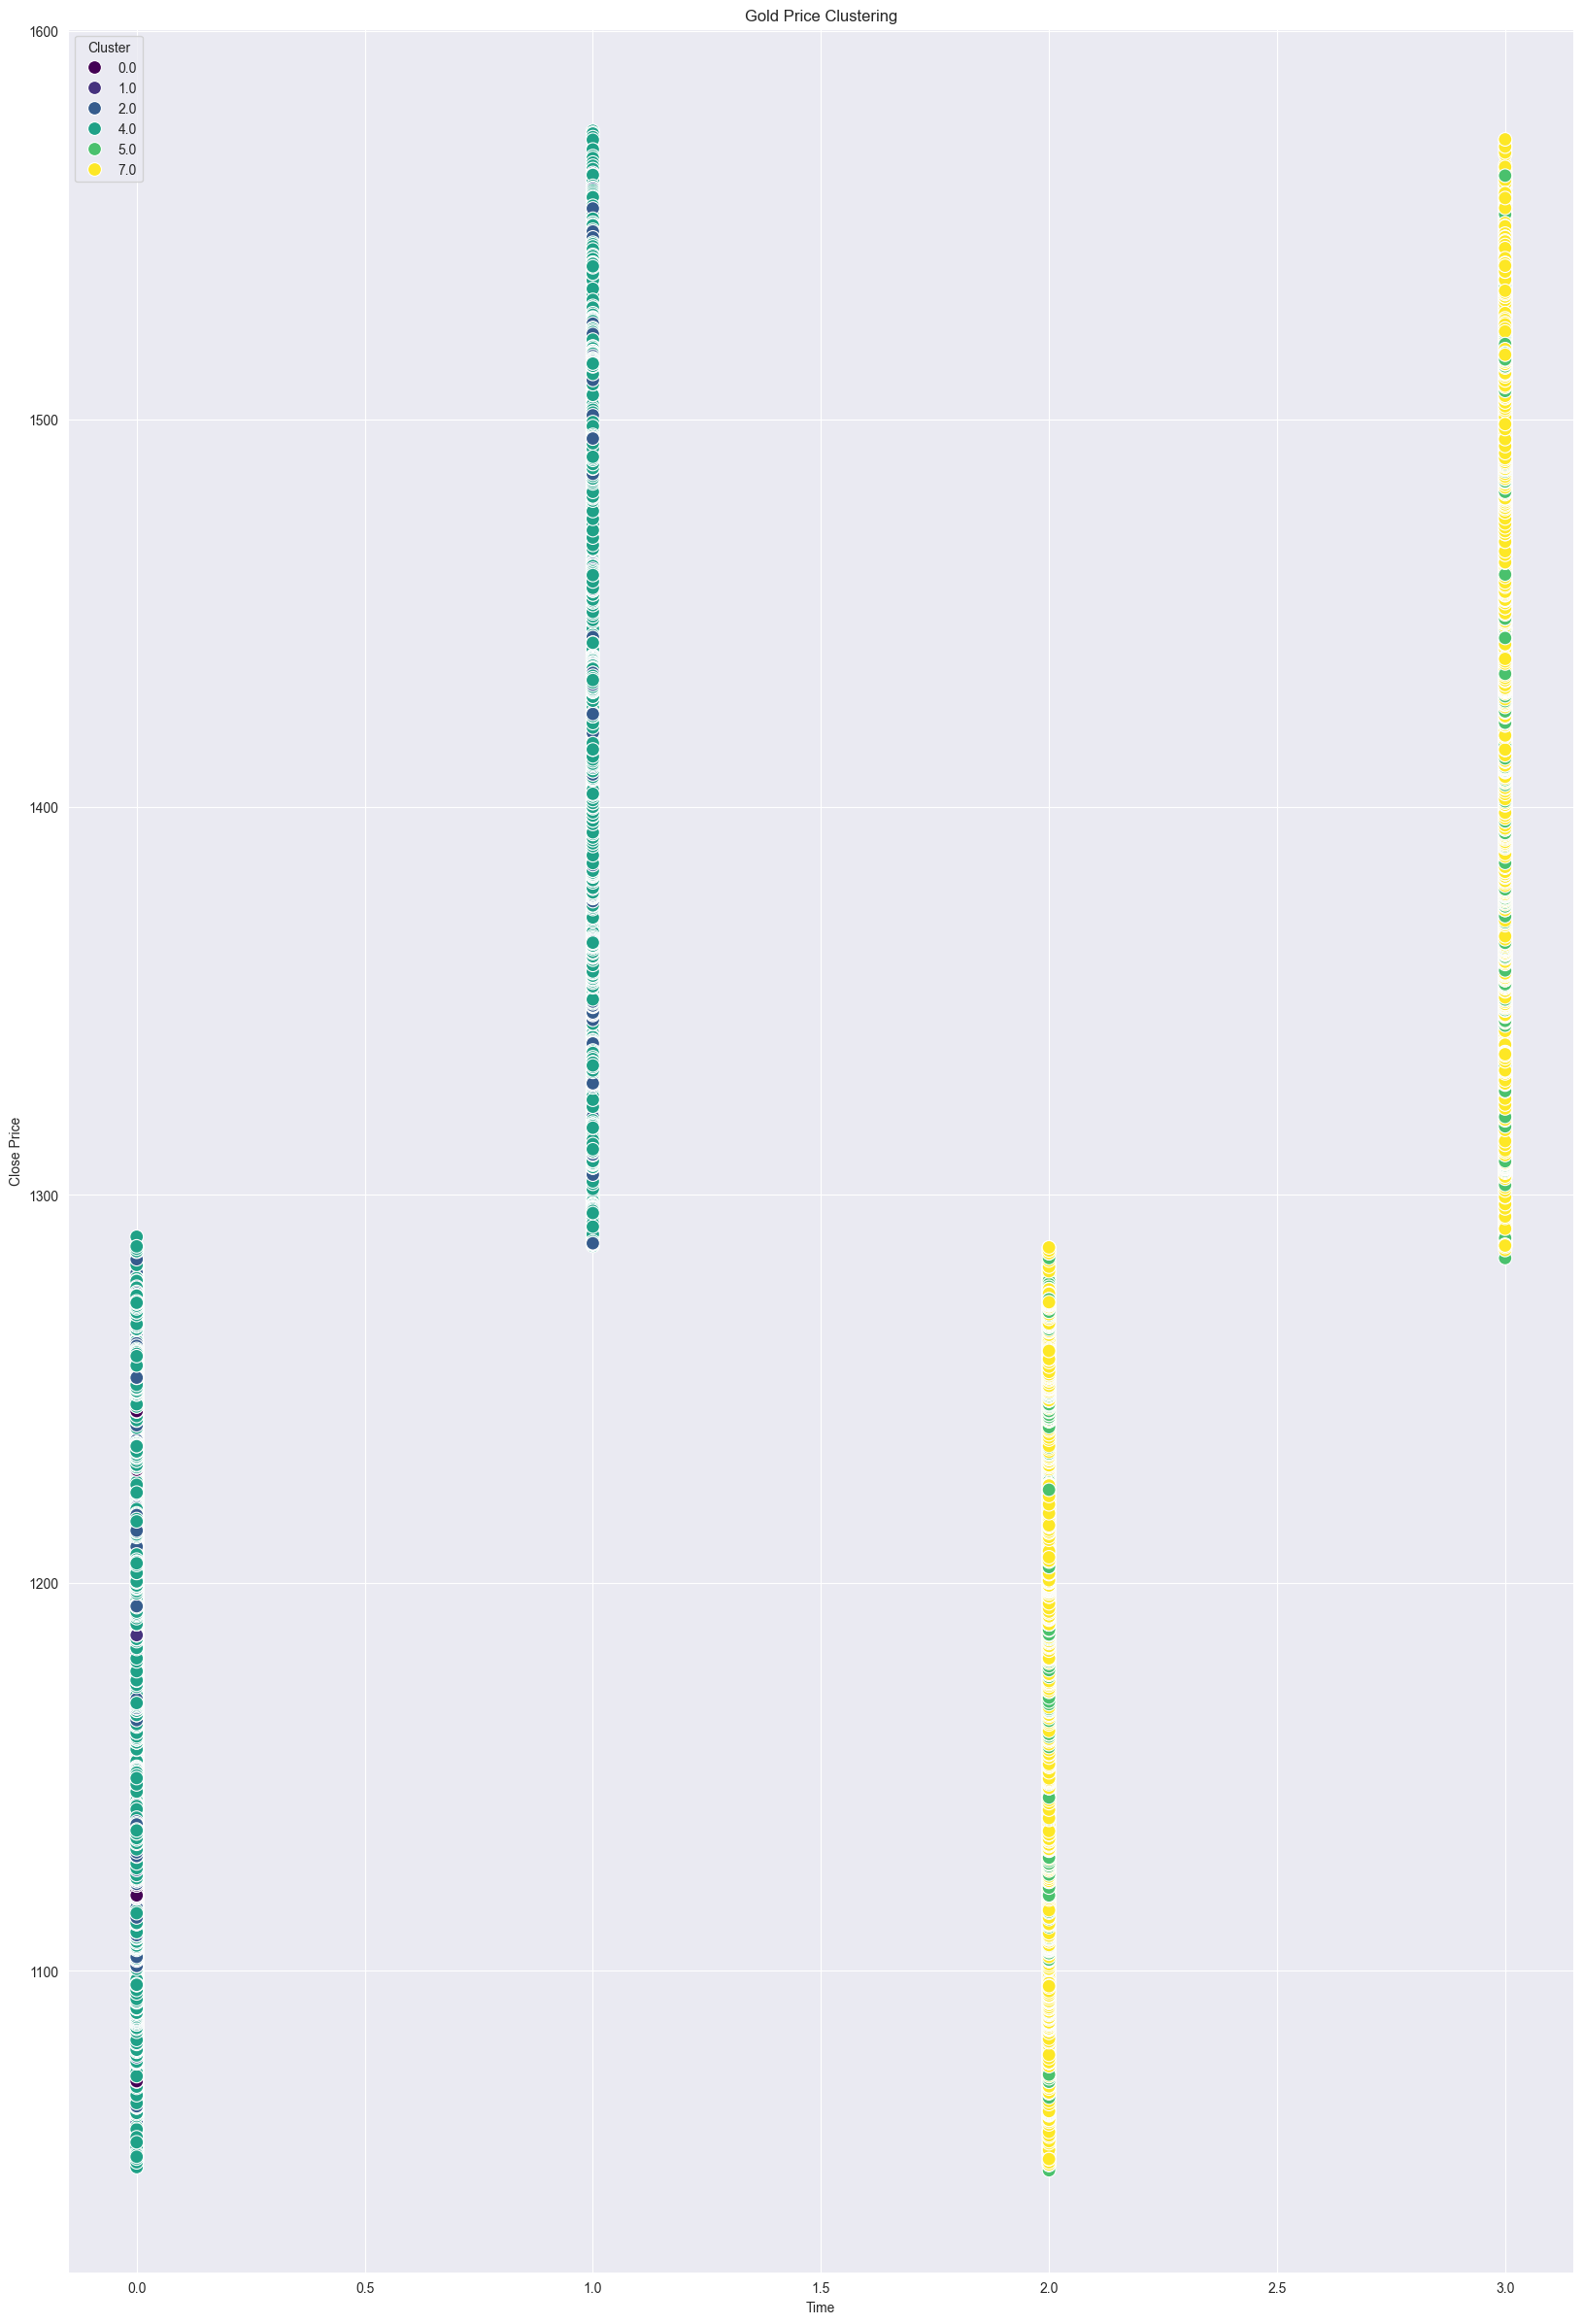

In [21]:
 # Visualize the clusters
plt.figure(figsize=(20, 30))
sns.scatterplot(
    data=df,
    x='Cluster',
    y='open',
    hue='status',
    palette='viridis',
    s=100)
plt.title('Gold Price Clustering')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend(title='Cluster')
plt.show()

C:\Users\liar88828\AppData\Local\Temp\ipykernel_5140\3246897429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\liar88828\AppData\Local\Temp\ipykernel_5140\3246897429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\liar88828\AppData\Local\Temp\ipykernel_5140\3246897429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\liar88828\AppData\Local\Temp\ipykernel_5140\3246897429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variab

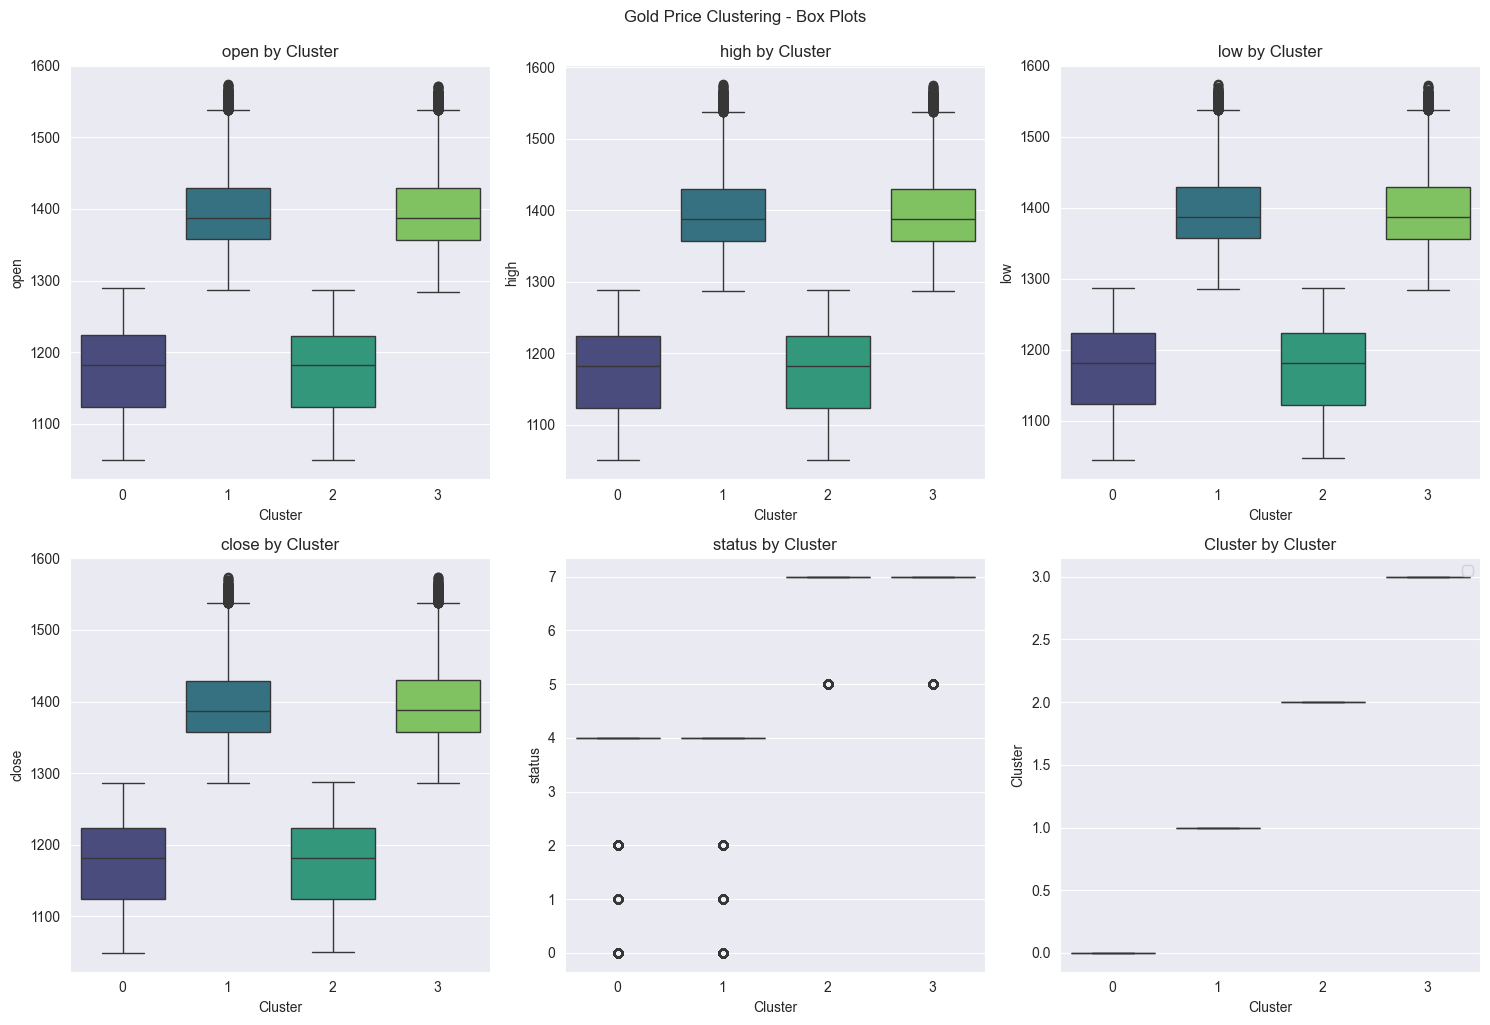

In [22]:
# Visualize clusters using box plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(
        data=df,
        x='Cluster',
        y=feature,
        palette='viridis')
    plt.title(f'{feature} by Cluster')
plt.tight_layout()
plt.suptitle(
    'Gold Price Clustering - Box Plots',
    y=1.02)

plt.legend()

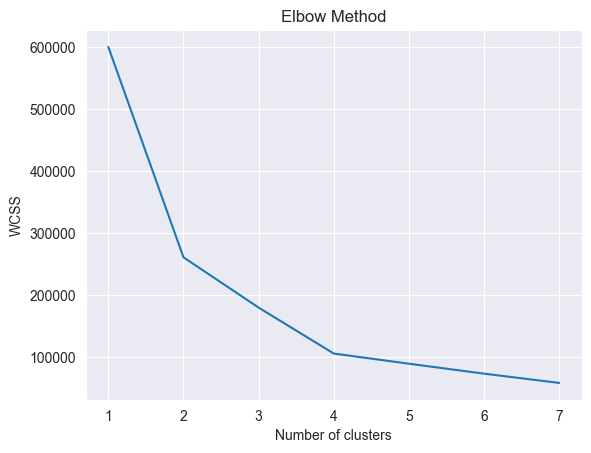

In [28]:
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 8), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()